In [372]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import math

from scipy.stats import chi2_contingency
from scipy.stats import chi2

df_oxidation = pd.read_csv('./dataset_origin/Oxidation.csv')
df_photo_soft = pd.read_csv('./dataset_origin/Photo_softbake.csv')
df_photo_litho = pd.read_csv('./dataset_origin/Photo_lithograpy.csv')
df_etching = pd.read_csv('./dataset_origin/Etching.csv')
df_ion = pd.read_csv('./dataset_origin/Ion_Implantation.csv')
df_inspect = pd.read_csv('./dataset_origin/final_data.csv')

print(len(df_inspect))

1702


In [373]:
path = []
for i in range(len(df_inspect)):
    temp = ''
    temp = str(df_oxidation['Ox_Chamber'][i]) + str(df_photo_soft['photo_soft_Chamber'][i]) + \
    str(df_photo_litho['lithography_Chamber'][i]) + str(df_etching['Etching_Chamber'][i]) + \
    str(df_ion['Chamber_Num'][i])
    path.append(temp)
    
print(len(path))

df_inspect['Path'] = path
df_inspect

1702


,Unnamed: 0,No_Die,Ox_Chamber,process,type,Temp_OXid,Vapor,ppm,Pressure,Oxid_time,...,Flux480s,Flux840s,input_Energy,Temp_implantation,Furance_Temp,RTA_Temp,Target,Error_message,Wafer_map,Path
0,0,NOLSM325131325,2,Oxidation,dry,1214.307948,O2,26.69,0.203,120.00,...,3.011187e+17,6.000012e+17,30795.934,103.433,854.0,154,141,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...,21111
1,1,NOLSM326132326,2,Oxidation,dry,978.110792,O2,30.86,0.217,137.00,...,3.026639e+17,6.000008e+17,32135.618,105.552,895.0,156,55,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 2 0 0 0 0 0 0 ...,21122
2,2,NOLSM327133327,2,Oxidation,dry,1176.019149,O2,31.07,0.218,116.00,...,2.983347e+17,5.999989e+17,31057.895,102.598,898.0,152,96,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...,21133
3,3,NOLSM328134328,2,Oxidation,dry,933.442733,O2,31.04,0.196,143.00,...,2.999225e+17,5.999997e+17,32140.566,102.963,879.0,155,105,none,[[0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 2 0 0 0 0 0 0 ...,21111
4,4,NOLSM329135329,2,Oxidation,wet,1140.598752,H2O,31.37,0.215,76.00,...,3.018136e+17,6.000004e+17,31986.009,101.419,882.0,155,79,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 ...,21122
5,5,NOLSM330136330,2,Oxidation,dry,1311.225435,O2,41.03,0.213,114.00,...,2.993570e+17,5.999966e+17,31982.632,103.847,871.0,152,96,none,[[0 0 0 0 0 0 0 0 0 0 2 2 1 1 2 1 0 0 0 0 0 0 ...,21133
6,6,NOLSM331137331,2,Oxidation,dry,938.276677,O2,30.24,0.211,116.00,...,2.989981e+17,5.999990e+17,32499.229,102.840,916.0,157,115,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 2 0 0 0 0 0 0 ...,21111
7,7,NOLSM332138332,2,Oxidation,dry,1033.815333,O2,30.45,0.199,218.00,...,3.001836e+17,5.999995e+17,32016.390,104.368,891.0,153,167,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 1 0 0 0 0 0 0 ...,21122
8,8,NOLSM333139333,2,Oxidation,wet,1154.565473,H2O,32.35,0.217,119.00,...,3.013753e+17,6.000017e+17,31810.414,103.625,903.0,153,45,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 1 1 2 0 0 0 0 0 0 ...,21133
9,9,NOLSM3341310334,2,Oxidation,wet,992.357358,H2O,35.26,0.202,111.77,...,3.000877e+17,6.000019e+17,31969.699,102.847,883.0,161,54,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 2 2 0 0 0 0 0 0 ...,21211


In [374]:
all_path=set(path)
all_path=[s for s in all_path]
all_pd_path=pd.DataFrame(all_path)
all_pd_path

,0
0,31311
1,13133
2,21333
3,11122
4,23222
5,21111
6,22322
7,32322
8,33222
9,32133


In [375]:
all_path=set(path)
all_path=[s for s in all_path]
all_pd_path=pd.DataFrame(all_path,columns=['Path'])
data_list=[]
for c in all_path:
    print(c)
    data_by_path= pd.DataFrame()
    for i in range(len(df_inspect)):
        if df_inspect.loc[i,['Path']][0]==c:
            a=pd.DataFrame(df_inspect.loc[i])
            data_by_path=pd.concat([data_by_path,a],axis=1)

    data_list.append(data_by_path.transpose())
    print(len(data_list))


31311
1
13133
2
21333
3
11122
4
23222
5
21111
6
22322
7
32322
8
33222
9
32133
10
21322
11
22133
12
33233
13
12233
14
11333
15
23311
16
22311
17
12211
18
11111
19
13222
20
12122
21
12133
22
13311
23
21211
24
33333
25
12333
26
11311
27
32122
28
12311
29
12222
30
13333
31
21233
32
23233
33
33211
34
11211
35
13322
36
31211
37
31333
38
11322
39
31233
40
23211
41
13233
42
33111
43
31222
44
33311
45
21133
46
23111
47
31122
48
21122
49
23133
50
13122
51
11233
52
31111
53
23322
54
31322
55
12322
56
32233
57
21311
58
31133
59
32211
60
32222
61
11133
62
33122
63
33322
64
32311
65
21222
66
11222
67
13111
68
22111
69
22122
70
22333
71
22233
72
23333
73
12111
74
23122
75
32333
76
22222
77
32111
78
33133
79
13211
80
22211
81


In [376]:
data_list[0]

,Unnamed: 0,No_Die,Ox_Chamber,process,type,Temp_OXid,Vapor,ppm,Pressure,Oxid_time,...,Flux480s,Flux840s,input_Energy,Temp_implantation,Furance_Temp,RTA_Temp,Target,Error_message,Wafer_map,Path
100,100,NOLSM3711420,3,Oxidation,dry,1028.35,O2,36.93,0.227,75,...,3.00883e+17,6.00002e+17,31795.5,104.113,875,154,95,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 2 2 0 0 0 0 0 0 ...,31311
180,180,NOLSM4241619424,3,Oxidation,dry,1098.25,O2,38.09,0.202,92,...,2.99864e+17,6.00001e+17,31414.2,102.388,878,156,15,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 2 1 1 0 0 0 0 0 0 ...,31311
183,183,NOLSM4271622427,3,Oxidation,wet,996.498,H2O,36.83,0.218,150,...,3.00034e+17,6e+17,31606.6,104.196,886,154,259,[['Scratch']],[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 2 0 0 0 0 0 0 ...,31311
186,186,NOLSM4301625430,3,Oxidation,dry,1043.99,O2,38.44,0.213,72,...,3.00274e+17,5.99999e+17,31832.2,99.999,902,155,57,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 1 0 0 0 0 0 0 ...,31311
202,202,NOLSM4191614,3,Oxidation,dry,1191.27,O2,40.93,0.219,31,...,2.99554e+17,5.99998e+17,31946,101.047,884,153,96,none,[[0 0 0 0 0 0 0 0 0 0 2 2 1 1 2 2 0 0 0 0 0 0 ...,31311
303,303,NOLSM466187,3,Oxidation,dry,871.88,O2,22.18,0.216,223,...,2.99707e+17,6.00002e+17,32202.7,102.883,917,154,15,none,[[0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 2 0 0 0 0 0 0 ...,31311
408,408,NOLSM517204,3,Oxidation,dry,871.393,O2,22.15,0.21,217,...,2.985e+17,6e+17,32297.6,102.491,923,154,45,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 2 1 1 0 0 0 0 0 0 ...,31311
505,505,NOLSM20120,3,Oxidation,dry,1037.44,O2,36.74,0.205,147,...,3.03475e+17,6.00001e+17,32922.8,104.804,923,152,92,none,[[0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 ...,31311
539,539,NOLSM5672127,3,Oxidation,dry,871.465,O2,22.1,0.214,221,...,3.01413e+17,5.99998e+17,32202.6,103.192,924,155,117,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 2 0 0 0 0 0 0 ...,31311
716,716,NOLSM69315,3,Oxidation,dry,1114.97,O2,30.87,0.202,156,...,2.99499e+17,6.00001e+17,29986,103.541,877,154,193,none,[[0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 ...,31311


In [377]:
count=0
for i in data_list:
    for j in range(len(i)):
        count+=1
print(count)

1702


In [378]:
len(data_list)

81

In [379]:
all_list=[]
all_path=[]
for j in range(len(data_list)):
    target_mean = data_list[j]['Target'].mean()
    #표준편차 루트C
    target_std = math.sqrt(target_mean)

    #관리 상한(UCL)
    ucl = target_mean + 3*target_std
    cl = target_mean
    lcl = target_mean - 3*target_std
    control=True
    group=data_list[j]['Target']
    group_pd=pd.DataFrame(group)

    index_list = group_pd.index
    out_list=[]
    out_list_num=[]
    for i in index_list:
        if group_pd.loc[i,['Target']][0]>ucl or group_pd.loc[i,['Target']][0]<lcl:
            out_list.append(i)
            out_list_num.append(group_pd.loc[i,['Target']][0])
            print("out of control limit")
            control=False

    if control==True:
        print("All group within control limit")

    out_pd=pd.DataFrame(out_list)
    out_pd_num=pd.DataFrame(out_list_num)
    out_pd.columns=['index']
    out_pd_num.columns=['Target']
    all_list.append(len(out_pd))

out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of contro

out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of contro

out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit


In [380]:
data_dict={}
for i in range(len(data_list)):
    data_list[i]['Path']
    idx=data_list[i].index
    idx=idx[0]
    path = data_list[i]['Path'][idx]
    dum_Data=data_list[i].drop(['Path'],axis=1)
    #mean_Data=np.mean(data_list[i]['Target'])
    data_dict[path]=dum_Data

In [381]:
sum=0
for key,values in data_dict.items():
    sum+=len(values)
print(sum)

1702


In [382]:
length=[]
for keys,values in data_dict.items():
    length.append(len(values))
pd_length=pd.DataFrame(length,columns=['cnt'])
pd_length.sum()

cnt    1702
dtype: int64

In [383]:
pd.set_option('display.max_rows', None)

a=pd.DataFrame(all_list,columns=['Outlier'])
outlier_path=pd.concat([a,all_pd_path],axis=1)
outlier_path

out_path_cnt=pd.concat([outlier_path,pd_length],axis=1)
asd=out_path_cnt['Outlier']/out_path_cnt['cnt']
asd=pd.DataFrame(asd,columns=['ratio'])
asd
out_all_path=pd.concat([out_path_cnt,asd],axis=1)
out_all_path


,Outlier,Path,cnt,ratio
0,15,31311,26,0.576923
1,13,13133,22,0.590909
2,15,21333,28,0.535714
3,6,11122,12,0.500000
4,17,23222,43,0.395349
5,17,21111,29,0.586207
6,3,22322,9,0.333333
7,6,32322,9,0.666667
8,16,33222,34,0.470588
9,16,32133,26,0.615385


In [384]:
mean_data = [np.mean(data_list[x]['Target']) for x in range(len(data_list))]
mean_data = pd.DataFrame(mean_data,columns=['mean'])

In [385]:
out_all_path=pd.concat([out_all_path,mean_data],axis=1)

In [386]:
sum_data = [np.sum(data_list[x]['Target']) for x in range(len(data_list))]
sum_data = pd.DataFrame(sum_data,columns=['sum'])
sum_data

,sum
0,2894
1,2587
2,3096
3,1050
4,4732
5,3624
6,784
7,1092
8,2341
9,2284


In [387]:
out_all_path=pd.concat([out_all_path,sum_data],axis=1)

In [388]:
out_all_path

,Outlier,Path,cnt,ratio,mean,sum
0,15,31311,26,0.576923,111.307692,2894
1,13,13133,22,0.590909,117.590909,2587
2,15,21333,28,0.535714,110.571429,3096
3,6,11122,12,0.500000,87.500000,1050
4,17,23222,43,0.395349,110.046512,4732
5,17,21111,29,0.586207,124.965517,3624
6,3,22322,9,0.333333,87.111111,784
7,6,32322,9,0.666667,121.333333,1092
8,16,33222,34,0.470588,68.852941,2341
9,16,32133,26,0.615385,87.846154,2284


In [389]:
by_cnt=out_all_path.sort_values(by='cnt',ascending=False)
by_cnt

,Outlier,Path,cnt,ratio,mean,sum
76,29,22222,45,0.644444,115.377778,5192
4,17,23222,43,0.395349,110.046512,4732
60,16,32222,43,0.372093,105.813953,4550
19,23,13222,43,0.534884,100.302326,4313
65,21,21222,42,0.500000,106.738095,4483
66,16,11222,41,0.390244,100.170732,4107
43,17,31222,35,0.485714,115.314286,4036
8,16,33222,34,0.470588,68.852941,2341
29,14,12222,33,0.424242,112.363636,3708
61,16,11133,30,0.533333,86.533333,2596


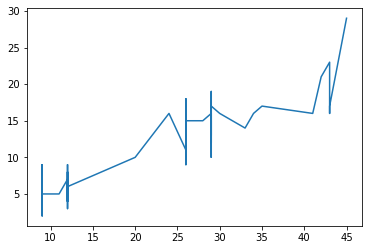

In [390]:
plt.plot(by_cnt['cnt'],by_cnt['Outlier'])

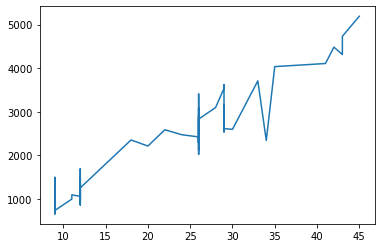

In [391]:
plt.plot(by_cnt['cnt'],by_cnt['sum'])

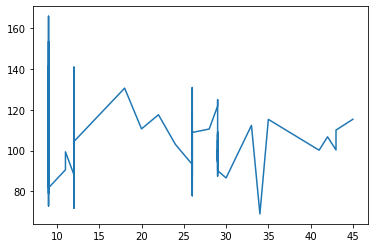

In [392]:
plt.plot(by_cnt['cnt'],by_cnt['mean'])

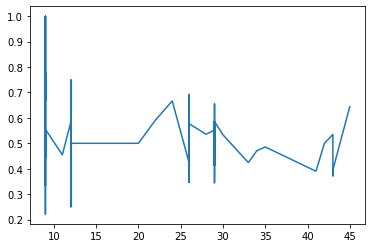

In [393]:
plt.plot(by_cnt['cnt'],by_cnt['ratio'])

In [948]:
by_Outlier=out_all_path.sort_values(by='Outlier',ascending=False)
by_Outlier=by_Outlier.reset_index(drop=True)
by_Outlier

,Outlier,Path,cnt,ratio,mean,sum
0,29,22222,45,0.644444,115.377778,5192
1,23,13222,43,0.534884,100.302326,4313
2,21,21222,42,0.500000,106.738095,4483
3,19,22111,29,0.655172,106.896552,3100
4,18,31111,26,0.692308,130.961538,3405
5,17,21111,29,0.586207,124.965517,3624
6,17,12111,29,0.586207,90.137931,2614
7,17,31133,26,0.653846,119.769231,3114
8,17,31222,35,0.485714,115.314286,4036
9,17,23222,43,0.395349,110.046512,4732


In [912]:
by_ratio=out_all_path.sort_values(by='ratio',ascending=False)
by_ratio=by_ratio.reset_index(drop=True)
by_ratio

,Outlier,Path,cnt,ratio,mean,sum
0,9,31211,9,1.000000,166.000000,1494
1,9,31233,9,1.000000,134.777778,1213
2,7,31122,9,0.777778,141.555556,1274
3,7,33233,9,0.777778,82.555556,743
4,9,12122,12,0.750000,91.000000,1092
5,9,13322,12,0.750000,96.083333,1153
6,9,12211,12,0.750000,80.250000,963
7,18,31111,26,0.692308,130.961538,3405
8,8,13233,12,0.666667,87.916667,1055
9,16,22133,24,0.666667,103.041667,2473


In [946]:
out1=pd.DataFrame(data_dict['31211']['Target'])
out2=pd.DataFrame(data_dict['31233']['Target'])
out3=pd.DataFrame(data_dict['31122']['Target'])
out4=pd.DataFrame(data_dict['33233']['Target'])
out5=pd.DataFrame(data_dict['12122']['Target'])

out_final = pd.concat([out1,out2])
out_final = pd.concat([out_final,out3])
out_final = pd.concat([out_final,out4])
out_final = pd.concat([out_final,out5])
out_final
out_final.sort_index()


,Target
163,118
166,57
169,159
171,61
173,97
174,86
176,54
177,84
179,48
281,24


## 비율 높은것

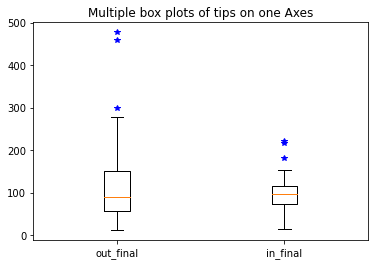

In [947]:
fig, ax = plt.subplots()
ax.boxplot([out_final['Target'], in_final['Target']], sym="b*")
plt.title('Multiple box plots of tips on one Axes')
plt.xticks([1, 2], 
           ['out_final', 'in_final'])
plt.show()


In [949]:
out1=pd.DataFrame(data_dict['22222']['Target'])
out2=pd.DataFrame(data_dict['13222']['Target'])
out3=pd.DataFrame(data_dict['21222']['Target'])
out4=pd.DataFrame(data_dict['22111']['Target'])
out5=pd.DataFrame(data_dict['31111']['Target'])

out_final = pd.concat([out1,out2])
out_final = pd.concat([out_final,out3])
out_final = pd.concat([out_final,out4])
out_final = pd.concat([out_final,out5])
out_final
out_final.sort_index()


,Target
10,84
13,15
16,238
35,45
38,112
40,171
41,87
46,174
54,90
57,88


## 갯수 순서

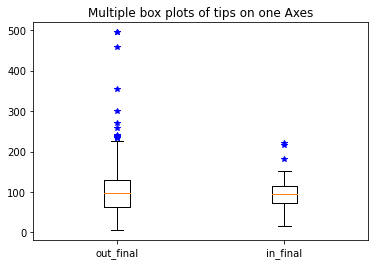

In [950]:
fig, ax = plt.subplots()
ax.boxplot([out_final['Target'], in_final['Target']], sym="b*")
plt.title('Multiple box plots of tips on one Axes')
plt.xticks([1, 2], 
           ['out_final', 'in_final'])
plt.show()

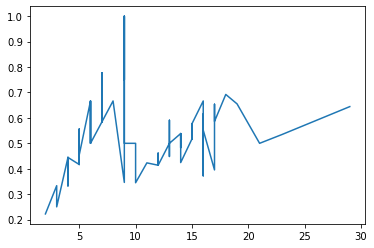

In [396]:
plt.plot(by_Outlier['Outlier'],by_Outlier['ratio'])

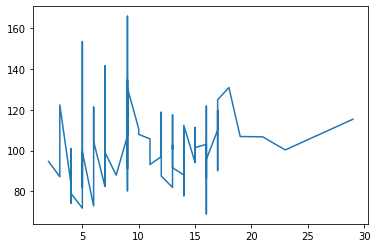

In [397]:
plt.plot(by_Outlier['Outlier'],by_Outlier['mean'])

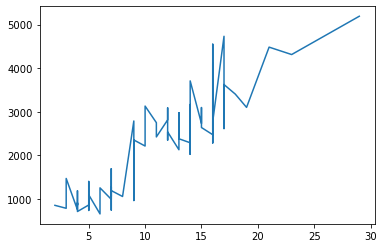

In [398]:
plt.plot(by_Outlier['Outlier'],by_Outlier['sum'])

In [399]:
out_all_path.sort_values(by='ratio',ascending=False)

,Outlier,Path,cnt,ratio,mean,sum
36,9,31211,9,1.000000,166.000000,1494
39,9,31233,9,1.000000,134.777778,1213
47,7,31122,9,0.777778,141.555556,1274
12,7,33233,9,0.777778,82.555556,743
20,9,12122,12,0.750000,91.000000,1092
35,9,13322,12,0.750000,96.083333,1153
17,9,12211,12,0.750000,80.250000,963
52,18,31111,26,0.692308,130.961538,3405
41,8,13233,12,0.666667,87.916667,1055
11,16,22133,24,0.666667,103.041667,2473


Text(0, 0.5, 'count')

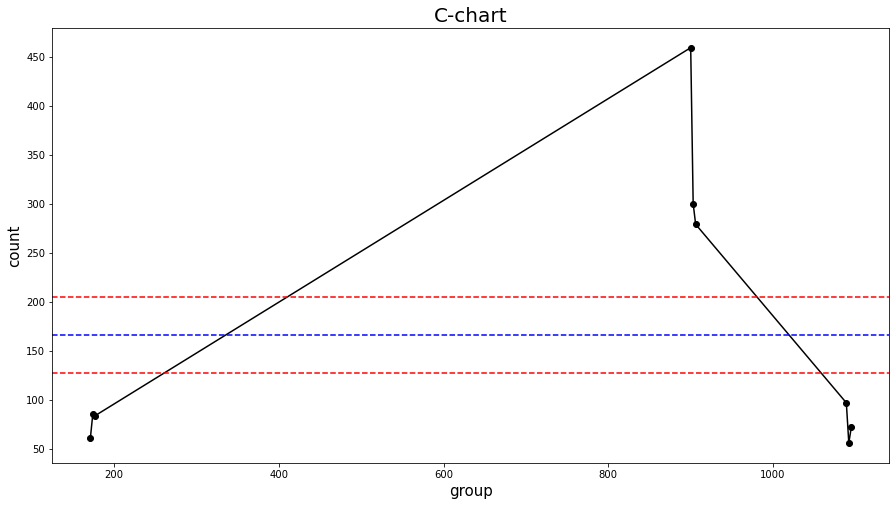

In [400]:

u_data=data_dict['31211']
target_mean = u_data['Target'].mean()
#표준편차 루트C
target_std = math.sqrt(target_mean)

#관리 상한(UCL)
ucl = target_mean + 3*target_std
cl = target_mean
lcl = target_mean - 3*target_std

fig = plt.figure(figsize=(15,8))
plt.plot(u_data['Target'],linestyle='-',marker='o',color='black')
plt.axhline(ucl,color='red',linestyle='dashed')
plt.axhline(lcl,color='red',linestyle='dashed')
plt.axhline(cl,color='blue',linestyle='dashed')

plt.title("C-chart",fontsize=20)
plt.xlabel("group",fontsize=15)
plt.ylabel("count",fontsize=15)

In [848]:
upper_path=by_Outlier.loc[0:3,['Path']]
lower_path=by_Outlier.loc[78:81,['Path']]

In [849]:
upper_list=upper_path.values.tolist()
lower_list=lower_path.values.tolist()

In [850]:
upper_values=[]
for i in upper_list:
    Target_num=data_dict[i[0]]['Target'].values.tolist()
    upper_values.extend(Target_num)
print(len(upper_values))

159


In [851]:
upper_list

[['22222'], ['13222'], ['21222'], ['22111']]

In [852]:
lower_values=[]
for i in lower_list:
    Target_num=data_dict[i[0]]['Target'].values.tolist()
    lower_values.extend(Target_num)
print(len(lower_values))

30


In [853]:
lower_list

[['11211'], ['22322'], ['32122']]

In [854]:
from scipy import stats
print(stats.shapiro(upper_values))
print(stats.shapiro(lower_values))

ShapiroResult(statistic=0.830115795135498, pvalue=2.6139685034565208e-12)
ShapiroResult(statistic=0.9450629353523254, pvalue=0.1245388314127922)


In [855]:
t_result = stats.ttest_ind(lower_values,upper_values)
t,p = t_result.statistic.round(3),t_result.pvalue.round(3)

In [856]:
print("2Sample ttest")
print("t:{}".format(t))
print("p:{}".format(p))

2Sample ttest
t:-0.289
p:0.773


In [857]:
from pingouin import mwu

results2 = mwu(lower_values,upper_values,
               tail='one-sided')

results2

,U-val,tail,p-val,RBC,CLES
MWU,2609.5,greater,0.207476,-0.09413,0.547065


## lower_values<upper_values라고 할 수 있다

In [860]:
upper_list

[['22222'], ['13222'], ['21222'], ['22111']]

In [861]:
sum2=0
for i in upper_list:
    sum2+=len(data_dict[i[0]])
sum2

159

In [862]:
sum2=0
for i in lower_list:
    sum2+=len(data_dict[i[0]])
sum2

30

### 200개 이상 카운트

In [863]:
high_1=[]
all_count=[]
for i in upper_list:
    #data_dict[i[0]]['Target']
    high_1.append(len(data_dict[i[0]]['Target'][data_dict[i[0]]['Target']>200]))
    all_count.append(len(data_dict[i[0]]['Target']))
    
high_1
high_0=[all_count[i]-high_1[i] for i in range(len(high_1))]
high_0

[38, 41, 38, 27]

In [864]:
sum_high_1=0
for x in high_1:
    sum_high_1+=x
sum_high_1


sum_high_0=0
for x in high_0:
    sum_high_0+=x
sum_high_0

144

In [865]:
low_1=[]
all_count=[]
for i in lower_list:
    #data_dict[i[0]]['Target']
    low_1.append(len(data_dict[i[0]]['Target'][data_dict[i[0]]['Target']>200]))
    all_count.append(len(data_dict[i[0]]['Target']))
    
low_1
low_0=[all_count[i]-low_1[i] for i in range(len(low_1))]
low_0

[11, 9, 9]

In [866]:
sum_low_1=0
for x in low_1:
    sum_low_1+=x
sum_low_1


sum_low_0=0
for x in low_0:
    sum_low_0+=x
sum_low_0

29

In [867]:
table=[[sum_high_1,sum_high_0],[sum_low_1,sum_low_0]]
table

[[15, 144], [1, 29]]

In [868]:
stat, p, dof, expected = chi2_contingency(table)


print("chi-square test")
print("chisq:{0:0.3f}".format(stat))
print('p:{0:0.3f}'.format(p))
print("degree of freedom:{}".format(dof))
print('expected_value::\n{}'.format(expected.round(3)))

chi-square test
chisq:0.553
p:0.457
degree of freedom:1
expected_value::
[[ 13.46 145.54]
 [  2.54  27.46]]


## ratio 기준

In [817]:
by_ratio

,Outlier,Path,cnt,ratio,mean,sum
0,9,31211,9,1.000000,166.000000,1494
1,9,31233,9,1.000000,134.777778,1213
2,7,31122,9,0.777778,141.555556,1274
3,7,33233,9,0.777778,82.555556,743
4,9,12122,12,0.750000,91.000000,1092
5,9,13322,12,0.750000,96.083333,1153
6,9,12211,12,0.750000,80.250000,963
7,18,31111,26,0.692308,130.961538,3405
8,8,13233,12,0.666667,87.916667,1055
9,16,22133,24,0.666667,103.041667,2473


In [963]:
upper_path=by_ratio.loc[0:4,['Path']]
lower_path=by_ratio.loc[76:81,['Path']]


upper_list=upper_path.values.tolist()
lower_list=lower_path.values.tolist()

In [964]:
upper_path

,Path
0,31211
1,31233
2,31122
3,33233
4,12122


In [966]:
lower_list

[['11322'], ['22322'], ['13211'], ['11211'], ['32122']]

In [967]:
upper_values=[]
for i in upper_list:
    Target_num=data_dict[i[0]]['Target'].values.tolist()
    upper_values.extend(Target_num)
print(len(upper_values))

lower_values=[]
for i in lower_list:
    Target_num=data_dict[i[0]]['Target'].values.tolist()
    lower_values.extend(Target_num)
print(len(lower_values))


from scipy import stats
print(stats.shapiro(upper_values))
print(stats.shapiro(lower_values))

48
54
ShapiroResult(statistic=0.804787814617157, pvalue=1.6707879240129841e-06)
ShapiroResult(statistic=0.9539052248001099, pvalue=0.03690135478973389)


In [968]:
t_result = stats.ttest_ind(lower_values,upper_values)
t,p = t_result.statistic.round(3),t_result.pvalue.round(3)

print("2Sample ttest")
print("t:{}".format(t))
print("p:{}".format(p))

from pingouin import mwu

results2 = mwu(lower_values,upper_values,
               tail='one-sided')

results2

2Sample ttest
t:-1.698
p:0.093


,U-val,tail,p-val,RBC,CLES
MWU,1259.5,greater,0.597974,0.028164,0.485918


In [970]:
high_1=[]
all_count=[]
for i in upper_list:
    #data_dict[i[0]]['Target']
    high_1.append(len(data_dict[i[0]]['Target'][data_dict[i[0]]['Target']>=200]))
    all_count.append(len(data_dict[i[0]]['Target']))
    
high_1
high_0=[all_count[i]-high_1[i] for i in range(len(high_1))]
high_0

sum_high_1=0
for x in high_1:
    sum_high_1+=x
sum_high_1


sum_high_0=0
for x in high_0:
    sum_high_0+=x
sum_high_0

40

In [972]:
low_1=[]
all_count=[]
for i in lower_list:
    #data_dict[i[0]]['Target']
    low_1.append(len(data_dict[i[0]]['Target'][data_dict[i[0]]['Target']>200]))
    all_count.append(len(data_dict[i[0]]['Target']))
    
low_1
low_0=[all_count[i]-low_1[i] for i in range(len(low_1))]
low_0

sum_low_1=0
for x in low_1:
    sum_low_1+=x
sum_low_1


sum_low_0=0
for x in low_0:
    sum_low_0+=x
sum_low_0

table=[[sum_high_1,sum_high_0],[sum_low_1,sum_low_0]]
table



[[8, 40], [2, 52]]

In [973]:
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)

print("chi-square test")
print("chisq:{0:0.3f}".format(stat))
print('p:{0:0.3f}'.format(p))
print("degree of freedom:{}".format(dof))
print('expected_value::\n{}'.format(expected.round(3)))

dof=1
[[ 4.70588235 43.29411765]
 [ 5.29411765 48.70588235]]
chi-square test
chisq:3.474
p:0.062
degree of freedom:1
expected_value::
[[ 4.706 43.294]
 [ 5.294 48.706]]


In [870]:
by_Outlier=out_all_path.sort_values(by='Outlier',ascending=False)
over20=by_Outlier[by_Outlier['cnt']>20]
over20

,Outlier,Path,cnt,ratio,mean,sum
76,29,22222,45,0.644444,115.377778,5192
19,23,13222,43,0.534884,100.302326,4313
65,21,21222,42,0.500000,106.738095,4483
68,19,22111,29,0.655172,106.896552,3100
52,18,31111,26,0.692308,130.961538,3405
5,17,21111,29,0.586207,124.965517,3624
73,17,12111,29,0.586207,90.137931,2614
58,17,31133,26,0.653846,119.769231,3114
43,17,31222,35,0.485714,115.314286,4036
4,17,23222,43,0.395349,110.046512,4732


In [873]:
over20=over20.reset_index(drop=True)
over20

,Outlier,Path,cnt,ratio,mean,sum
0,29,22222,45,0.644444,115.377778,5192
1,23,13222,43,0.534884,100.302326,4313
2,21,21222,42,0.500000,106.738095,4483
3,19,22111,29,0.655172,106.896552,3100
4,18,31111,26,0.692308,130.961538,3405
5,17,21111,29,0.586207,124.965517,3624
6,17,12111,29,0.586207,90.137931,2614
7,17,31133,26,0.653846,119.769231,3114
8,17,31222,35,0.485714,115.314286,4036
9,17,23222,43,0.395349,110.046512,4732


In [901]:
upper_path=over20.loc[0:10,['Path']]
lower_path=over20.loc[32:42,['Path']]


upper_list=upper_path.values.tolist()
lower_list=lower_path.values.tolist()

upper_values=[]
for i in upper_list:
    Target_num=data_dict[i[0]]['Target'].values.tolist()
    upper_values.extend(Target_num)
print(len(upper_values))

lower_values=[]
for i in lower_list:
    Target_num=data_dict[i[0]]['Target'].values.tolist()
    lower_values.extend(Target_num)
print(len(lower_values))


from scipy import stats
print(stats.shapiro(upper_values))
print(stats.shapiro(lower_values))

KeyError: 0

In [902]:
high_1=[]
all_count=[]
for i in upper_list:
    #data_dict[i[0]]['Target']
    high_1.append(len(data_dict[i[0]]['Target'][data_dict[i[0]]['Target']>200]))
    all_count.append(len(data_dict[i[0]]['Target']))
    
high_1
high_0=[all_count[i]-high_1[i] for i in range(len(high_1))]
high_0

sum_high_1=0
for x in high_1:
    sum_high_1+=x
sum_high_1


sum_high_0=0
for x in high_0:
    sum_high_0+=x
sum_high_0

low_1=[]
all_count=[]
for i in lower_list:
    #data_dict[i[0]]['Target']
    low_1.append(len(data_dict[i[0]]['Target'][data_dict[i[0]]['Target']>200]))
    all_count.append(len(data_dict[i[0]]['Target']))
    
low_1
low_0=[all_count[i]-low_1[i] for i in range(len(low_1))]
low_0

sum_low_1=0
for x in low_1:
    sum_low_1+=x
sum_low_1


sum_low_0=0
for x in low_0:
    sum_low_0+=x
sum_low_0

table=[[sum_high_1,sum_high_0],[sum_low_1,sum_low_0]]
table

stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)

print("chi-square test")
print("chisq:{0:0.3f}".format(stat))
print('p:{0:0.3f}'.format(p))
print("degree of freedom:{}".format(dof))
print('expected_value::\n{}'.format(expected.round(3)))

dof=1
[[ 6. 66.]
 [ 5. 55.]]
chi-square test
chisq:4.900
p:0.027
degree of freedom:1
expected_value::
[[ 6. 66.]
 [ 5. 55.]]


In [903]:
from scipy import stats
print(stats.shapiro(upper_values))
print(stats.shapiro(lower_values))


t_result = stats.ttest_ind(lower_values,upper_values)
t,p = t_result.statistic.round(3),t_result.pvalue.round(3)

print("2Sample ttest")
print("t:{}".format(t))
print("p:{}".format(p))

from pingouin import mwu

results2 = mwu(lower_values,upper_values,
               tail='one-sided')

results2

ShapiroResult(statistic=0.8193228244781494, pvalue=5.8997883911615645e-08)
ShapiroResult(statistic=0.9738727807998657, pvalue=0.22478263080120087)
2Sample ttest
t:-1.673
p:0.097


,U-val,tail,p-val,RBC,CLES
MWU,2040.0,less,0.292461,0.055556,0.527778


## under20

In [904]:
by_Outlier=out_all_path.sort_values(by='Outlier',ascending=False)
under20=by_Outlier[by_Outlier['cnt']<20]
under20=under20.reset_index(drop=True)
under20

,Outlier,Path,cnt,ratio,mean,sum
0,9,32333,18,0.500000,130.666667,2352
1,9,12211,12,0.750000,80.250000,963
2,9,31211,9,1.000000,166.000000,1494
3,9,13322,12,0.750000,96.083333,1153
4,9,12122,12,0.750000,91.000000,1092
5,9,31233,9,1.000000,134.777778,1213
6,8,13233,12,0.666667,87.916667,1055
7,7,21322,12,0.583333,99.166667,1190
8,7,21233,12,0.583333,88.166667,1058
9,7,11233,12,0.583333,141.000000,1692


In [908]:
upper_path=under20.loc[0:10,['Path']]
lower_path=under20.loc[26:36,['Path']]


upper_list=upper_path.values.tolist()
lower_list=lower_path.values.tolist()

upper_values=[]
for i in upper_list:
    Target_num=data_dict[i[0]]['Target'].values.tolist()
    upper_values.extend(Target_num)
print(len(upper_values))

lower_values=[]
for i in lower_list:
    Target_num=data_dict[i[0]]['Target'].values.tolist()
    lower_values.extend(Target_num)
print(len(lower_values))


from scipy import stats
print(stats.shapiro(upper_values))
print(stats.shapiro(lower_values))


t_result = stats.ttest_ind(lower_values,upper_values)
t,p = t_result.statistic.round(3),t_result.pvalue.round(3)

print("2Sample ttest")
print("t:{}".format(t))
print("p:{}".format(p))

from pingouin import mwu

results2 = mwu(lower_values,upper_values,
               tail='one-sided')

results2

132
111
ShapiroResult(statistic=0.8448957800865173, pvalue=1.8193416218004188e-10)
ShapiroResult(statistic=0.9498715996742249, pvalue=0.00038412550929933786)
2Sample ttest
t:-2.437
p:0.016


,U-val,tail,p-val,RBC,CLES
MWU,6527.0,less,0.071715,0.109064,0.554532


In [909]:
high_1=[]
all_count=[]
for i in upper_list:
    #data_dict[i[0]]['Target']
    high_1.append(len(data_dict[i[0]]['Target'][data_dict[i[0]]['Target']>200]))
    all_count.append(len(data_dict[i[0]]['Target']))
    
high_1
high_0=[all_count[i]-high_1[i] for i in range(len(high_1))]
high_0

sum_high_1=0
for x in high_1:
    sum_high_1+=x
sum_high_1


sum_high_0=0
for x in high_0:
    sum_high_0+=x
sum_high_0

low_1=[]
all_count=[]
for i in lower_list:
    #data_dict[i[0]]['Target']
    low_1.append(len(data_dict[i[0]]['Target'][data_dict[i[0]]['Target']>200]))
    all_count.append(len(data_dict[i[0]]['Target']))
    
low_1
low_0=[all_count[i]-low_1[i] for i in range(len(low_1))]
low_0

sum_low_1=0
for x in low_1:
    sum_low_1+=x
sum_low_1


sum_low_0=0
for x in low_0:
    sum_low_0+=x
sum_low_0

table=[[sum_high_1,sum_high_0],[sum_low_1,sum_low_0]]
table

stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)

print("chi-square test")
print("chisq:{0:0.3f}".format(stat))
print('p:{0:0.3f}'.format(p))
print("degree of freedom:{}".format(dof))
print('expected_value::\n{}'.format(expected.round(3)))

dof=1
[[  9.77777778 122.22222222]
 [  8.22222222 102.77777778]]
chi-square test
chisq:5.392
p:0.020
degree of freedom:1
expected_value::
[[  9.778 122.222]
 [  8.222 102.778]]


<AxesSubplot:>

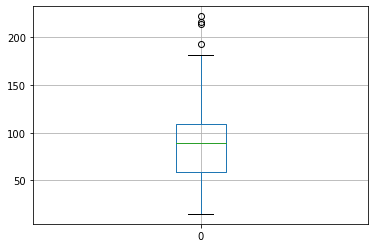

In [910]:
a=pd.DataFrame(lower_values)
a.boxplot()

<AxesSubplot:>

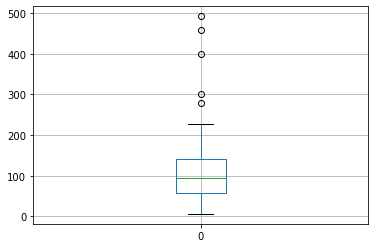

In [911]:
b=pd.DataFrame(upper_values)
b.boxplot(0)